# Business case



Problem statement:
    
The data is analysis is to be performed to get the spending nature of various groups like male-female, age groups, marital status etc so that Walmart can make necessary actions to grow the business among various customer groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats import norm
from scipy.stats import ttest_ind

In [2]:
df=pd.read_csv('walmart.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [9]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
df.drop_duplicates('User_ID', keep='first')['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [11]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [12]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [13]:
df['Product_ID'].value_counts().reset_index().rename(columns={'index':'Product_ID','Product_ID':'Count'}).head(10)

,Product_ID,Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


Above are the top 10 selling items along with the number of purchases.

In [14]:
df[df['Gender']=='M']['Product_ID'].value_counts().reset_index().rename(columns={'index':'Product_ID','Product_ID':'Count'}).head(10)

,Product_ID,Count
0,P00265242,1372
1,P00025442,1267
2,P00110742,1247
3,P00112142,1223
4,P00057642,1212
5,P00184942,1141
6,P00046742,1129
7,P00237542,1109
8,P00145042,1104
9,P00010742,1069


Above are top 10 items purchased by men.

In [15]:
df[df['Gender']=='F']['Product_ID'].value_counts().reset_index().rename(columns={'index':'Product_ID','Product_ID':'Count'}).head(10)

,Product_ID,Count
0,P00265242,508
1,P00220442,440
2,P00058042,387
3,P00255842,375
4,P00110742,365
5,P00034742,364
6,P00059442,358
7,P00117442,357
8,P00110842,357
9,P00025442,348


Above are top 10 items purchased by women.

In [16]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Average purchase amount of mean are higher than women.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

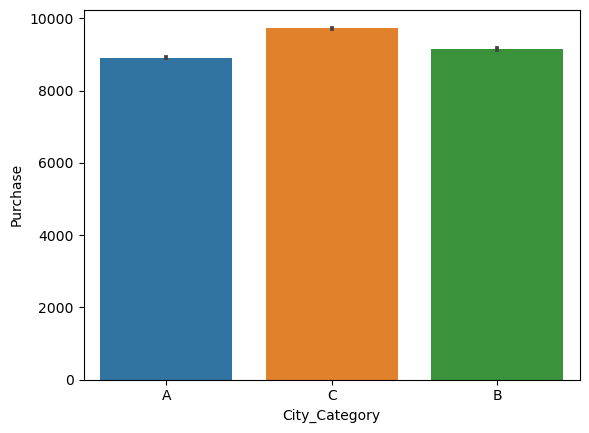

In [17]:
sns.barplot(data=df, x='City_Category', y='Purchase', estimator=np.mean)

Insight: Average purchase amount is higher for city category C, whereas that of A and B are comparable.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

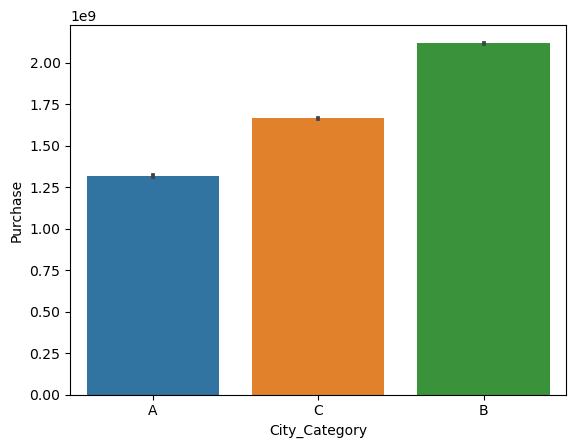

In [18]:
sns.barplot(data=df, x='City_Category', y='Purchase', estimator=np.sum)

Insight: When considering total purchase value, the decreasing order is B,C, and then A.

Recommendation: More marketing to be done to increase the revenue from city category A and C.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

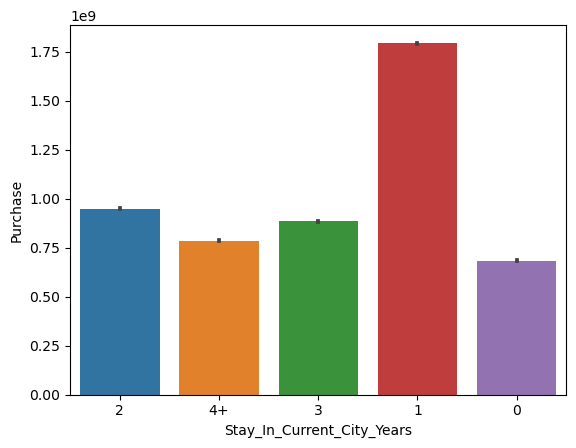

In [19]:
sns.barplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', estimator=np.sum)

Insight: Walmart is making maximum revenue from people who are in the first year in the city.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

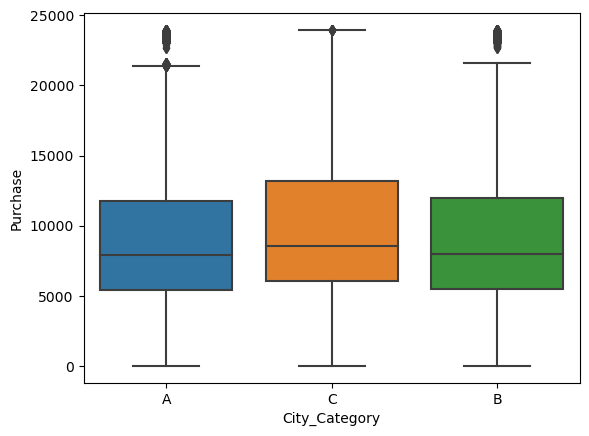

In [20]:
sns.boxplot(data=df, x='City_Category', y='Purchase')

Insight: The median value of purchase are higher for city category C. For other two categories median values are comparable. There are outliers observed here.

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

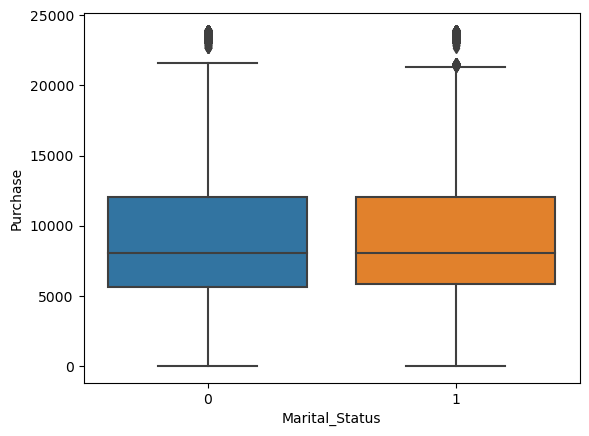

In [21]:
sns.boxplot(data=df, x='Marital_Status', y='Purchase')

Insight: Distribution are similar when comparing marital status. Median values are comparable and outliers are oberved.

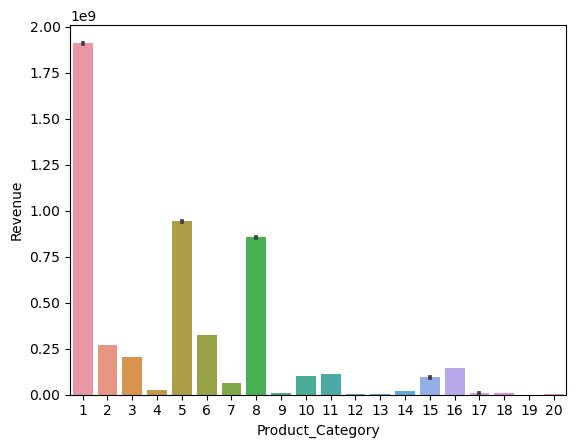

In [22]:
sns.barplot(data=df, x='Product_Category', y='Purchase',estimator=np.sum)
plt.ylabel('Revenue')
plt.show()

Insight: Above is the plot showing revenue against product category. 1 is the product category making highest revenue followed by 5,8,and 6.

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

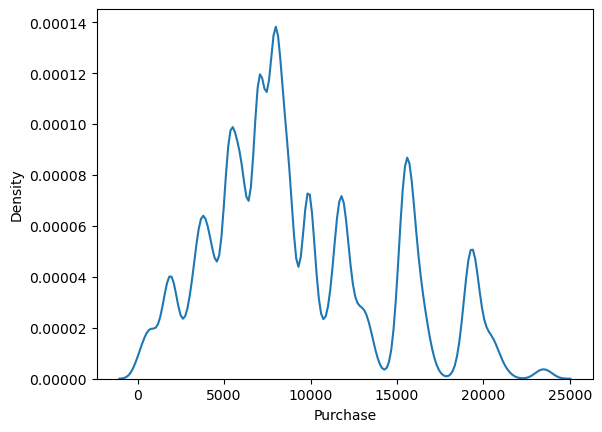

In [23]:
sns.kdeplot(data=df, x='Purchase')

The kdeplot of purchase amount shows several peaks.

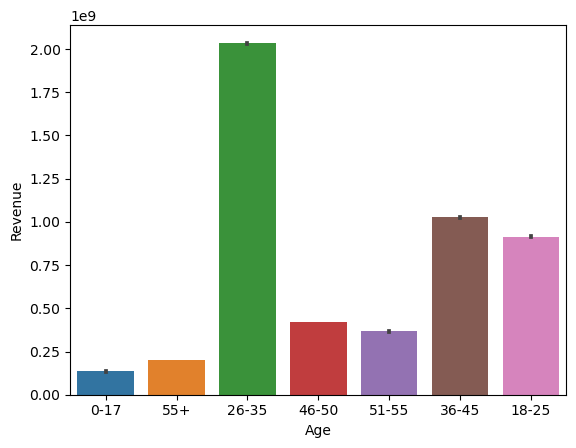

In [24]:
sns.barplot(data=df, x='Age', y='Purchase', estimator=np.sum)
plt.ylabel('Revenue')
plt.show()

Insight: The age category 26-35 is the one giving maximum revenue. It is followed by 36-45 and 18-25.

Recommendation: Promotion activities are to be done to increase the awareness of Walmart and benefits amont age below 17 and age above 46.

In [25]:
dft=df.groupby('Gender')['Purchase'].aggregate(['mean','std'])
dft

,mean,std
Gender,,
F,8734.565765,4767.233289
M,9437.526040,5092.186210


In [26]:
#Function to find 95 percent CI

def fun95(x):
    m=x['Purchase'].mean()
    s=x['Purchase'].std()
    se=s/np.sqrt(x.shape[0])
    z=norm.ppf(.5+95/200)
    return m-z*se,m+z*se

In [27]:
#Function to find 99 percent CI

def fun99(x):
    m=x['Purchase'].mean()
    s=x['Purchase'].std()
    se=s/np.sqrt(x.shape[0])
    z=norm.ppf(.5+99/200)
    return m-z*se,m+z*se

In [28]:
#Function to find 90 percent CI

def fun90(x):
    m=x['Purchase'].mean()
    s=x['Purchase'].std()
    se=s/np.sqrt(x.shape[0])
    z=norm.ppf(.5+90/200)
    return m-z*se,m+z*se

# Confidence intervals based on gender groups

95% confidence interval for purchase amount per transaction is obtained as given below

In [29]:
df.groupby('Gender').apply(fun95)

Gender
F    (8709.21154714068, 8759.919983170272)
M    (9422.01944736257, 9453.032633581959)
dtype: object

99% confidence interval for purchase amount per transaction is obtained as given below

In [30]:
df.groupby('Gender').apply(fun99)

Gender
F     (8701.24467443839, 8767.88685587256)
M    (9417.146922669479, 9457.90515827505)
dtype: object

90% confidence interval for purchase amount per transaction is obtained as given below

In [31]:
df.groupby('Gender').apply(fun90)

Gender
F     (8713.287834648021, 8755.84369566293)
M    (9424.512497305488, 9450.539583639042)
dtype: object

Insight: We can see that confidence intervals for average spending of male and female are not overlapping for 90,95, and 99 percent confidence intervals. So its evident that male are spending more per purchase.

Recommendation: Since are spending more per purchase and we know the top products that are bought by male, we can keep more inventory of these items. And in case of female customers since the avg spending is less compared to male we can do more marketing for the top products bought by female customers to increase the popularity among female customers.

In [32]:
dfm=df[df['Gender']=="M"]['Purchase']
dff=df[df['Gender']=='F']['Purchase']

#Ho: mu1=mu2
#Ha: mu1!=mu2

alpha=0.05

tstat, p_value=ttest_ind(dfm,dff)
print('p value= ', p_value)

if p_value<alpha:
    print('Reject Ho')
    print('Avg spending are not equal')
else:
    print('Fail to reject Ho')
    print('Avg spending are equal')

p value=  0.0
Reject Ho
Avg spending are not equal


In [33]:
#Ho: mu1=mu2
#Ha: mu1>mu2

alpha=0.05

tstat, p_value=ttest_ind(dfm,dff)
print('p value= ', p_value)

if p_value<alpha:
    print('Reject Ho')
    print('Male spend more than female')
else:
    print('Fail to reject Ho')
    print('Avg spending are equal')

p value=  0.0
Reject Ho
Male spend more than female


-------------------------Confidence interval after varying sample size----------------------------------

In [65]:
dfsm=df[df['Gender']=='M'].sample(100000)
dfsm

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
351705,1000163,P00006342,M,18-25,4,A,1,0,5,1926
33522,1005140,P00048742,M,26-35,6,B,2,0,5,5249
375232,1003763,P00021342,M,26-35,2,A,1,0,5,5480
445834,1002665,P00015542,M,36-45,11,B,1,0,1,7601
212458,1002826,P00117142,M,36-45,12,A,4+,1,2,9792
...,...,...,...,...,...,...,...,...,...,...
80233,1000348,P00284842,M,51-55,7,B,2,1,1,19184
467102,1005954,P00114542,M,46-50,11,A,2,1,5,8730
534041,1004227,P00247642,M,26-35,19,A,0,0,7,16718
158749,1000543,P0096942,M,26-35,5,B,4+,1,3,10967


In [66]:
dfsf=df[df['Gender']=='F'].sample(100000)
dfsf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
385439,1005329,P00225042,F,26-35,5,B,1,0,8,10004
454404,1003945,P00193342,F,46-50,1,B,2,0,11,5917
363804,1001962,P00302442,F,18-25,1,B,0,1,5,5393
518033,1001755,P00058142,F,18-25,4,B,4+,0,3,5662
458148,1004482,P00296042,F,36-45,1,A,1,0,8,6160
...,...,...,...,...,...,...,...,...,...,...
4603,1000752,P00035042,F,26-35,3,A,3,0,5,6870
84632,1001088,P00303442,F,0-17,10,A,3,0,1,11975
412538,1003518,P00041942,F,18-25,7,A,2,0,5,5229
513095,1001088,P00297442,F,0-17,10,A,3,0,2,3259


In [70]:
dft=pd.concat([dfsm,dfsf])
dft

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
351705,1000163,P00006342,M,18-25,4,A,1,0,5,1926
33522,1005140,P00048742,M,26-35,6,B,2,0,5,5249
375232,1003763,P00021342,M,26-35,2,A,1,0,5,5480
445834,1002665,P00015542,M,36-45,11,B,1,0,1,7601
212458,1002826,P00117142,M,36-45,12,A,4+,1,2,9792
...,...,...,...,...,...,...,...,...,...,...
4603,1000752,P00035042,F,26-35,3,A,3,0,5,6870
84632,1001088,P00303442,F,0-17,10,A,3,0,1,11975
412538,1003518,P00041942,F,18-25,7,A,2,0,5,5229
513095,1001088,P00297442,F,0-17,10,A,3,0,2,3259


Confidence interval when considering 1 lakh rows of each genders.

In [71]:
dft.groupby('Gender').apply(fun95)

Gender
F    (8706.772461924274, 8765.888418075725)
M     (9401.488204103722, 9464.70931589628)
dtype: object

Confidence interval when whole data is considered.

In [72]:
df.groupby('Gender').apply(fun95)

Gender
F    (8709.21154714068, 8759.919983170272)
M    (9422.01944736257, 9453.032633581959)
dtype: object

Insight: We can see that when sample size increases, the distribution curve becomes narrower. That is the differene between the upper limit and lower limit reduces when sample size increases.

# Confidence intervals based on age groups

90 percent confidence interval

In [34]:
df.groupby('Age').apply(fun90)

Age
0-17      (8865.053694527898, 9001.87558636205)
18-25     (9143.433031607847, 9195.89418091473)
26-35    (9235.103000581124, 9270.278265158651)
36-45    (9306.441376202305, 9356.260013633442)
46-50    (9170.406859081897, 9246.844535854758)
51-55    (9492.161430973249, 9577.454630947223)
55+      (9280.067707714425, 9392.493211184385)
dtype: object

95 percent confidence interval

In [35]:
df.groupby('Age').apply(fun95)

Age
0-17     (8851.947970542686, 9014.981310347262)
18-25    (9138.407948753442, 9200.919263769136)
26-35     (9231.73367640003, 9273.647589339746)
36-45    (9301.669410965314, 9361.031978870433)
46-50    (9163.085142648752, 9254.166252287903)
51-55    (9483.991472776577, 9585.624589143894)
55+       (9269.29883441773, 9403.262084481079)
dtype: object

99 percent confidence interval

In [36]:
df.groupby('Age').apply(fun99)

Age
0-17      (8826.333576446717, 9040.59570444323)
18-25    (9128.586709366526, 9210.740503156052)
26-35     (9225.148523415806, 9280.23274232397)
36-45    (9292.342875603326, 9370.358514232421)
46-50    (9148.775263210646, 9268.476131726009)
51-55      (9468.02375292888, 9601.59230899159)
55+       (9248.251682432669, 9424.30923646614)
dtype: object

In [37]:
from statistics import mode

In [38]:
df.groupby('Age')['Product_Category'].aggregate(mode).reset_index()

,Age,Product_Category
0,0-17,5
1,18-25,5
2,26-35,5
3,36-45,5
4,46-50,5
5,51-55,5
6,55+,8


Insight: When comparing cnfidence interval for average spend for different age groups, we can see that the age group 51-55 is the one likely spend the most per purchase. Confidence intervals are following an increasing trend with increase in age till 45 age. The age group 46-50 is a bit cautious in spending.

Recommendation: Since the age group that is most likely spend higher amount is 51-55, we can focus on products that are mostly bought by this age group. We need to target the age group 46-50 to increase the revenue from this age group. We can focus on the product category that are mostly bought by this age group and give occassional discounts on these products. Here the product category that are most bought by this age group is 5.

# Confidence intervals based on marital status

90 percent confidence interval

In [39]:
df.groupby('Marital_Status').apply(fun90)

Marital_Status
0     (9251.39638582367, 9280.418852019344)
1    (9243.790713903045, 9278.558434261702)
dtype: object

95 percent confidence interval

In [40]:
df.groupby('Marital_Status').apply(fun95)

Marital_Status
0     (9248.61641818668, 9283.198819656332)
1    (9240.460427057078, 9281.888721107669)
dtype: object

99 percent confidence interval

In [41]:
df.groupby('Marital_Status').apply(fun99)

Marital_Status
0    (9243.183129136169, 9288.632108706845)
1     (9233.951570329937, 9288.39757783481)
dtype: object

In [42]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

Insight: The average spending of unmarried and married people are very similar and also the confidence intervals for these groups are also overlapping. So we cannot really conclude which category is spending more per puchase than the other.

Recommendation: Since the mean is very similar and conidence intervals overlapping we can say that Walmart can treat both groups equally or in other words they can treat them as a single group and take necessary actions to increase the sale of the whole group.

# Confidence intervals of purchase amount based on city category

90 percent confidence interval

In [43]:
df.groupby('City_Category').apply(fun90)

City_Category
A    (8891.002706225465, 8932.875725943502)
B    (9134.347589332983, 9168.253536230988)
C    (9699.289546263339, 9740.552440008021)
dtype: object

95 percent confidence interval

In [44]:
df.groupby('City_Category').apply(fun95)

City_Category
A     (8886.991825864907, 8936.88660630406)
B    (9131.099848963764, 9171.501276600207)
C    (9695.337107885243, 9744.504878386117)
dtype: object

99 percent confidence interval

In [46]:
df.groupby('City_Category').apply(fun99)

City_Category
A    (8879.152787720732, 8944.725644448235)
B     (9124.75232464291, 9177.848800921061)
C      (9687.61229128062, 9752.22969499074)
dtype: object

In [ ]:
df.groupby('City_Category').apply(fun99)

Insight: We can see that confidence interval of average spending per purchase is higher for city category C. This could be because of higher average income of people living there.

Recommendation: We can conduct special promotion campaign targeting city category A and B and seasonal discount sale to increase the reach among the customers from those city categories.

# Confidence interval of purchase amount based on years of stay in the current city

90 percent confidence interval

In [47]:
df.groupby('Stay_In_Current_City_Years').apply(fun90)

Stay_In_Current_City_Years
0       (9149.9804976727, 9210.169748301654)
1     (9231.362405599124, 9268.929441001605)
2      (9294.428331341942, 9346.43128883913)
3     (9260.152601615531, 9313.655636827038)
4+    (9247.244676113572, 9303.953067200167)
dtype: object

95 percent confidence interval

In [48]:
df.groupby('Stay_In_Current_City_Years').apply(fun95)

Stay_In_Current_City_Years
0       (9144.215165129453, 9215.9350808449)
1      (9227.763981470298, 9272.52786513043)
2      (9289.44713719065, 9351.412482990423)
3     (9255.027719899212, 9318.780518543357)
4+    (9241.812763783875, 9309.384979529865)
dtype: object

99 percent confidence interval

In [49]:
df.groupby('Stay_In_Current_City_Years').apply(fun99)

Stay_In_Current_City_Years
0     (9132.947149716982, 9227.203096257372)
1      (9220.73106563412, 9279.560780966609)
2     (9279.711675784345, 9361.147944396727)
3     (9245.011429297858, 9328.796809144711)
4+    (9231.196399265244, 9320.001344048496)
dtype: object

In [51]:
dft=df.drop_duplicates('User_ID', keep='first')
dft

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
...,...,...,...,...,...,...,...,...,...,...
185450,1004588,P00260042,F,26-35,4,C,0,0,5,8707
187076,1004871,P00242742,M,18-25,12,C,2,0,1,15389
221494,1004113,P00351842,M,36-45,17,C,3,0,5,5183
229480,1005391,P00339342,M,26-35,7,A,0,0,1,15831


In [52]:
pd.crosstab(dft['Gender'], dft['Marital_Status'])

Marital_Status,0,1
Gender,,
F,947,719
M,2470,1755


Male unmarried is the category where walmart is having highest number of customers.

In [53]:
pd.crosstab(dft['Gender'], dft['Age'])

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,78,287,545,333,182,142,99
M,140,782,1508,834,349,339,273


<AxesSubplot:xlabel='Age', ylabel='Gender'>

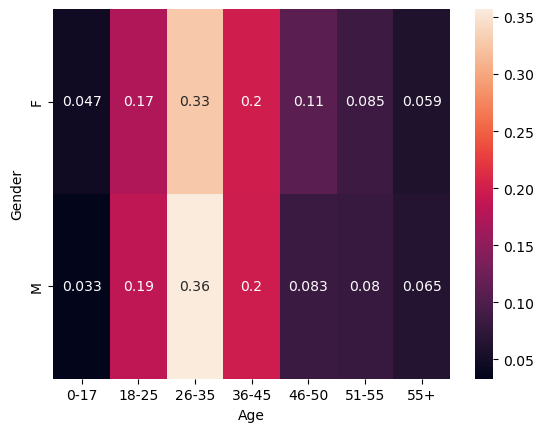

In [57]:
sns.heatmap(pd.crosstab(dft['Gender'], dft['Age'], normalize='index'),annot=True)

Insight: The age group 26-35 is the one where Walmart is having highest number of customers irrespective of gender.
    
Recommendation: The awareness among other age groups needs to be improved, and for this special discount targeting these age groups can be given once in a while.

<AxesSubplot:>

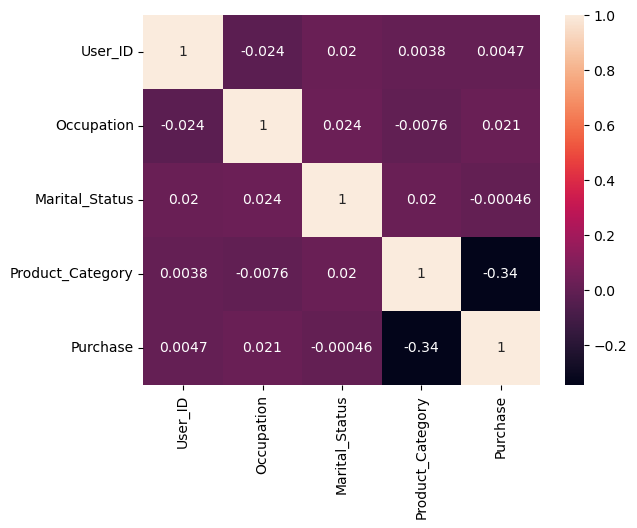

In [58]:
sns.heatmap(df.corr(), annot=True)

Insight: There is no significant correlation between any of the numerical columns.